In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

Ingresa el ID del cliente deseado: 4


/var/folders/hr/mdc9cyj17cq_dknl0gp46ndh0000gn/T/ipykernel_10861/1078670816.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_sorted['Mcc Nombre'], rotation=90, fontsize=9)
/var/folders/hr/mdc9cyj17cq_dknl0gp46ndh0000gn/T/ipykernel_10861/1078670816.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla.sort_values('Total', ascending=False, inplace=True)


,id_cliente,nombre_comercio,giro_nombre,mcc_nombre,December,February,January,March,November,Total
19,4,OPENPAY*TRANSPAIS UNICVICTORIA TAM,AGREGADOR,AGREGADOR,616.72,322.33,765.92,0.0,0.00,1704.97
17,4,MERCADO PAGO 3 CIUDAD DE MEX001,OTROS,MERCADO DIRECTO - VENTAS POR CATALOGO,475.98,0.00,0.00,0.0,0.00,475.98
20,4,ZAP ITALICA CD VICTORIA T028,RETAIL,ZAPATERIAS,0.00,0.00,199.07,0.0,0.00,199.07
15,4,CFE CONTIGO MU MEXICO DF DF,GOBIERNO,"SERV GUBERNAM, AGUA, ELECTRICIDAD,PREDIAL,TENE...",0.00,0.00,117.24,0.0,0.00,117.24
16,4,CONEKTA*OXXOSPIN CIUDAD DE MEX001,OTROS,SERVICIOS RELACIONES PUBLICAS (SERVICIOS CONSU...,0.00,0.00,0.00,0.0,11.79,11.79
18,4,OPENPAY*TRANSPAIS SAN VICTORIA TAM,AGREGADOR,AGREGADOR,0.00,10.45,0.00,0.0,0.00,10.45


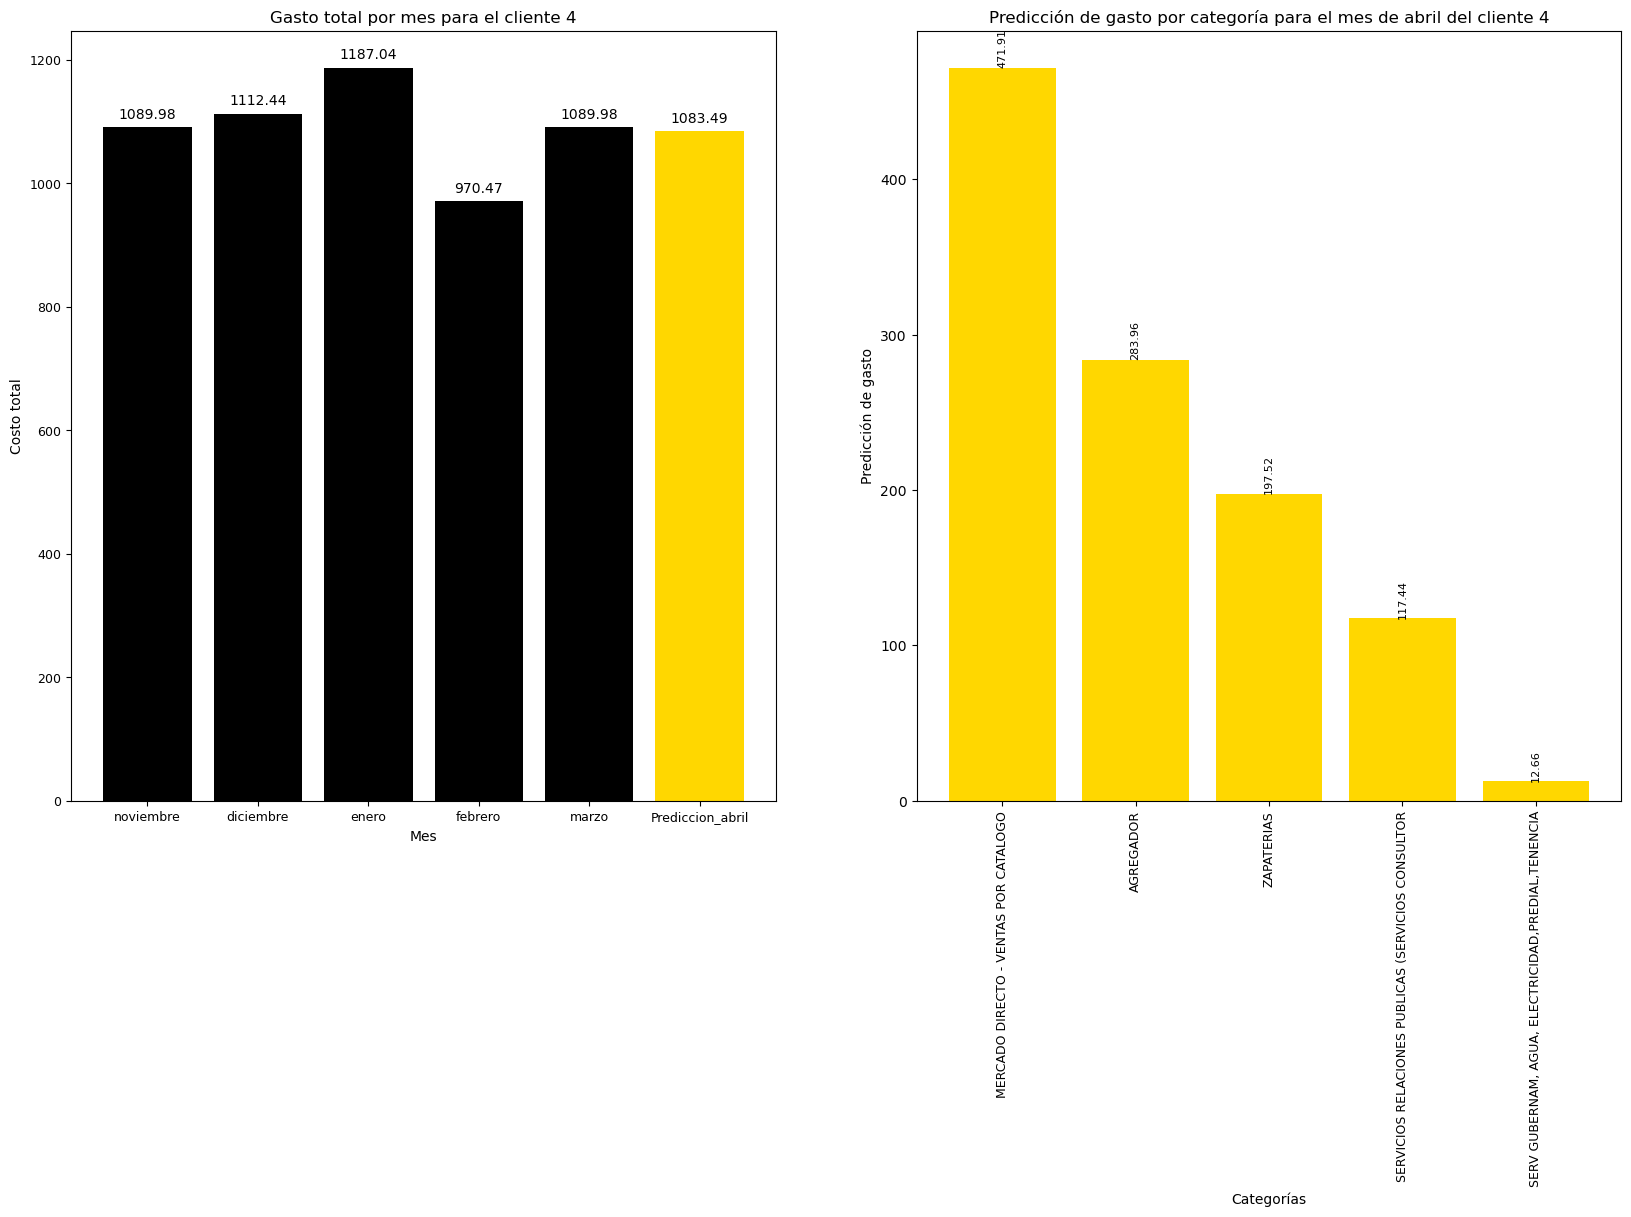

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:


df_lleno = pd.read_csv('df_lleno.csv')
mcc = df_lleno['Mcc Nombre']
data = data.drop('Mcc Nombre', axis=1)
df_wpred = pd.concat([data, mcc], axis=1)
# Cargar los datos en un DataFrame de Pandas
data = pd.read_csv('prediccion_abril.csv')

# Obtener el ID del cliente deseado como input del usuario
id_cliente = input("Ingresa el ID del cliente deseado: ")

# Verificar si el ID del cliente existe en el DataFrame
if int(id_cliente) not in data['Id Cliente'].values:
    print(f"El ID del cliente {id_cliente} no se encuentra en el DataFrame")
else:
    # Filtrar los datos para obtener solo las filas correspondientes al ID del cliente deseado
    cliente_data = data[data['Id Cliente'] == int(id_cliente)]

    # Obtener la columna que contiene el nombre del Mcc
    giro_n9 = cliente_data.columns.get_loc('Giro Nombre_9')

    # Obtener el número de columnas a partir de la columna del Mcc
    cantidad_meses = len(cliente_data.columns[giro_n9 + 1:])

    # Crear el diccionario de costos por mes
    meses = cliente_data.columns[giro_n9+1:]
    colors = ['black']*(len(meses)-1) + ['gold']
    costos_por_mes = {}
    for i, mes in enumerate(meses):
        costos_por_mes[mes] = cliente_data[mes].sum()

    # Crear la gráfica de barras para el primer subplot
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    ax1 = axs[0]
    ax1.bar(list(costos_por_mes.keys()), list(costos_por_mes.values()), color=colors)
    ax1.set_title(f'Gasto total por mes para el cliente {id_cliente}')
    ax1.set_xlabel('Mes')
    ax1.set_ylabel('Costo total')
    ax1.tick_params(labelsize=9)
    
    # Agregar leyenda con el valor del costo total en cada barra
    for i, costo in enumerate(costos_por_mes.values()):
        ax1.text(i, costo+10, f'{costo:.2f}', ha='center', va='bottom', fontsize=10)

    # Filtrar los datos para obtener solo las filas correspondientes al ID del cliente deseado
    cliente_data = df_wpred[df_wpred['Id Cliente'] == int(id_cliente)]

    df_sorted = cliente_data.sort_values(by='Prediccion_abril', ascending=False)

    # Redondear la columna 'Prediccion_abril' a 2 decimales
    df_sorted['Prediccion_abril'] = df_sorted['Prediccion_abril'].round(2)

    # Crear la gráfica de barras para el segundo subplot
    ax2 = axs[1]
    ax2.bar(df_sorted['Mcc Nombre'], df_sorted['Prediccion_abril'], color='gold')
    ax2.set_xlabel('Categorías')
    ax2.set_ylabel('Predicción de gasto')
    ax2.set_title(f'Predicción de gasto por categoría para el mes de abril del cliente {id_cliente}')

    
    # Agregar la etiqueta de valor redondeado a cada barra
    for i, val in enumerate(df_sorted['Prediccion_abril']):
        ax2.text(i, val, f"{val}", horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':8}, rotation=90)
        ax2.set_xticklabels(df_sorted['Mcc Nombre'], rotation=90, fontsize=9)

        plt.figure()

df_transacciones = pd.read_csv("df_transacciones.csv")
tabla=df_transacciones.loc[df_transacciones['id_cliente'] == int(id_cliente)]
tabla.sort_values('Total', ascending=False, inplace=True)
tabla

In [8]:
import tkinter as tk
import pandas as pd

# Crear la ventana de tkinter
window = tk.Tk()

# Configurar el título de la ventana
window.title("Tabla de transacciones")

# Configurar el tamaño de la ventana
window.geometry("800x600")

# Configurar el fondo de la ventana
window.configure(background="white")

# Crear un widget Label para mostrar la solicitud de entrada del ID del cliente
label_id_cliente = tk.Label(window, text="Ingresa el ID del cliente deseado:")
label_id_cliente.pack()

# Crear un widget Entry para que el usuario pueda ingresar el ID del cliente
entry_id_cliente = tk.Entry(window)
entry_id_cliente.pack()

# Función que se ejecuta cuando el usuario hace clic en el botón "Mostrar tabla"
def mostrar_tabla():
    # Obtener el ID del cliente ingresado por el usuario
    id_cliente = int(entry_id_cliente.get())

    # Leer el archivo CSV y filtrar los datos para obtener solo las filas correspondientes al ID del cliente deseado
    df_transacciones = pd.read_csv("df_transacciones.csv")
    tabla = df_transacciones.loc[df_transacciones['id_cliente'] == id_cliente]
    tabla.sort_values('Total', ascending=False, inplace=True)

    # Crear un widget Text para mostrar la tabla resultante
    text_tabla = tk.Text(window)
    text_tabla.insert(tk.END, tabla.to_string())
    text_tabla.pack()

# Crear un widget Button para que el usuario pueda enviar el formulario
button_mostrar_tabla = tk.Button(window, text="Mostrar tabla", command=mostrar_tabla)
button_mostrar_tabla.pack()

# Iniciar el loop principal de la ventana
window.mainloop()


/var/folders/hr/mdc9cyj17cq_dknl0gp46ndh0000gn/T/ipykernel_10861/746029936.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla.sort_values('Total', ascending=False, inplace=True)
/var/folders/hr/mdc9cyj17cq_dknl0gp46ndh0000gn/T/ipykernel_10861/746029936.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla.sort_values('Total', ascending=False, inplace=True)
/var/folders/hr/mdc9cyj17cq_dknl0gp46ndh0000gn/T/ipykernel_10861/746029936.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab